In [28]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/",one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [30]:
%matplotlib inline
import matplotlib.pyplot as plt 

In [31]:
batch_xs, batch_ys = mnist.train.next_batch(1)

[[ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]]


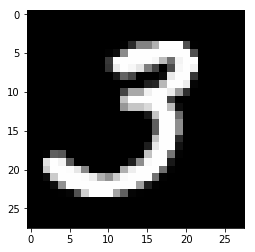

In [33]:
# reshape it back to 28x28
batch_xs = batch_xs.reshape([28,28])
plt.gray()
print (batch_ys)
plt.imshow(batch_xs)

In [34]:
# starting tensorflow code by using placeholder : a variable where we assign value at the later stage, this allows us to build computation graph withput needing hte actual data

x = tf.placeholder(tf.float32, [None, 784]) # placeholders are used to store data values
W = tf.Variable(tf.zeros([784,10])) #whereas Variable is the one tensorflow tweaks during training
b = tf.Variable(tf.zeros([10]))
y_ = tf.nn.softmax(tf.matmul(x,W) + b)

In [35]:
y = tf.placeholder(tf.float32, [None,10])

In [36]:
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y * tf.log(y_), reduction_indices = [1])) #reduction indices tells the 10 columns to be reduced to 1 value
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy) #Forward and backprop all taken care!

In [37]:
sess = tf.InteractiveSession() # deploys on CPU or GPU...

In [38]:
tf.global_variables_initializer().run()  #This initializes the variables which have only been computationally declared
for _ in range(1000):
    batchxs, batchys = mnist.train.next_batch(100) #Taking batch of 100 images
    sess.run(train_step, feed_dict = {x: batchxs, y: batchys})  #create session object and use feed_dict to match the values to the placeholders created earlier


In [39]:
correct_pred = tf.equal(tf.argmax(y_,1), tf.argmax(y, 1)) #equal compares the values, argmax returns the single value from one hot vector

In [40]:
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))  #since correct_pred is boolean value, we cast it to float 

In [41]:
print(sess.run(accuracy, feed_dict={x : mnist.test.images, y : mnist.test.labels}))  #to display the ouptut for anythin in tensor, we need to run the session

0.9175
